In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = os.getcwd().replace('code\\create_datasets', 'Bot_Data\\')

In [3]:
dialogues = pd.read_csv(PATH + 'dialogues.csv', sep = ',')

In [4]:
dialogues.head()

,Unnamed: 0,CreatedBy.Profile.Name,CommentBody,ParentId,CreatedDate,content.buttons
0,0,Bytel Customer Community User,Bonjour j'ai rendu mon équipement box est je n...,5001p00003imjqKAAQ,2020-08-03T16:18:00.000Z,NaN
1,1,Utilisateur Technique,Bonjour Je suis l’Assistant Virtuel de Bouygue...,5001p00003imjqKAAQ,2020-08-03T16:18:05.000Z,NaN
2,2,Utilisateur Technique,Voici des liens utiles qui peuvent vous orient...,5001p00003imjqKAAQ,2020-08-03T16:18:06.000Z,"[{'value': 'Problème Box/Tv', 'title': 'Problè..."
3,3,Bytel Customer Community User,Problème Box/Tv,5001p00003imjqKAAQ,2020-08-03T16:18:10.000Z,NaN
4,4,Utilisateur Technique,"Très bien, quelle est la ligne concernée par v...",5001p00003imjqKAAQ,2020-08-03T16:18:12.000Z,NaN


In [5]:
# Nombre d'échange par conversation
nb_echanges = list(dialogues.groupby('ParentId').CommentBody.count())
print( "nombre de conversations : %s" % (len(nb_echanges)))
print( "moyenne : %s" % (np.mean(nb_echanges)))
print( "écart-type : %s" % (np.std(nb_echanges)))

nombre de conversations : 9541
moyenne : 18.090975788701392
écart-type : 13.418825632512354


In [6]:
pd.Series(nb_echanges).describe()

count    9541.000000
mean       18.090976
std        13.419529
min         1.000000
25%         9.000000
50%        16.000000
75%        24.000000
max       148.000000
dtype: float64

In [7]:
# regarder les conversations qui ont moins de 4 échanges
abandons = dialogues.groupby('ParentId').filter(lambda x : x['CommentBody'].count() < 2)
print( "nombre de conversations avec moins d'1 échanges: %s" % (len(list(abandons.ParentId.unique()))))

nombre de conversations avec moins d'1 échanges: 250


In [8]:
longDialogues = dialogues[~dialogues.ParentId.isin(list(abandons.ParentId.unique()))]

In [9]:
len(longDialogues.ParentId.unique())

9291

Répartition des intentions : 
    - pbm de Box
    - Réseau mobile
    - Explication facture
    - Continuer

In [10]:
len(dialogues[dialogues['CommentBody'].astype('U').apply(lambda x: x.lower()) == 'explication facture'].ParentId.unique())

1483

In [11]:
def create_intent_datasets(category):
    ids = list(dialogues[dialogues['CommentBody'] == category].ParentId.unique())
    return ids, dialogues[dialogues.ParentId.isin(ids)]


bbox_ids, bbox_dialogues = create_intent_datasets('Problème Box/Tv')
facture_ids, facture_dialogues = create_intent_datasets('Explication facture')
reseau_ids, reseau_dialogues = create_intent_datasets('Réseau mobile')
continuer_ids, continuer_dialogues = create_intent_datasets('Continuer')

autres = dialogues[~dialogues.ParentId.isin(bbox_ids + facture_ids + reseau_ids + continuer_ids)]

bbox_dialogues.name = 'Problème Box/TV'
facture_dialogues.name = 'Explication facture'
reseau_dialogues.name = 'Réseau mobile'
continuer_dialogues.name = 'Continuer'
autres.name = 'Autres'

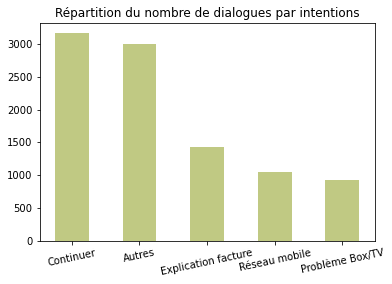

In [12]:
nb_dialogues = lambda data : [data.name, len(data.ParentId.unique())]

nb_dialogues_intent = dict(map(nb_dialogues, [bbox_dialogues, facture_dialogues, continuer_dialogues, reseau_dialogues, autres]))
nb_dialogues_intent = dict(sorted(nb_dialogues_intent.items(), key=lambda kv: kv[1], reverse = True))

plt.bar(nb_dialogues_intent.keys(), nb_dialogues_intent.values(), width = 0.5, color = '#C0C983')
plt.title("Répartition du nombre de dialogues par intentions")
plt.xticks(rotation = 12)

plt.savefig(PATH + 'repartition_intentions.png')

In [13]:
# bbox_dialogues.to_csv(PATH + 'bbox.csv')
# facture_dialogues.to_csv(PATH + 'facture.csv')
# continuer_dialogues.to_csv(PATH + 'continuer.csv')
# reseau_dialogues.to_csv(PATH + 'reseau.csv')
# autres.to_csv(PATH + 'autres.csv')

In [14]:
list(continuer_dialogues.CommentBody.tail(70))

[nan,
 'Oui, j’ai terminé',
 "Super ! Nous aurions besoin de vous pour répondre à notre enquête. 5 questions tout au plus, ça ne prendra qu'un instant.",
 '💡 A tout moment, vous pourrez dire "STOP" pour arrêter le questionnaire.',
 "Comment avez-vous trouvé l'échange avec votre conseiller Bouygues Télécom ?",
 '⭐⭐⭐⭐',
 "4 étoiles, merci ! Qu'avez-vous vraiment apprécié lors de cet échange ?",
 'A l’écoute de ma problématique Il manquerait une notion de temps d’attente avant qu’un conseillé prenne la communication',
 "Et concert la convivialité de l'échange ? ",
 '⭐⭐⭐⭐',
 'A présent, comment qualifiez-vous la solution apportée ?',
 '⭐⭐⭐⭐',
 "Lors de ce contact, avez-vous eu l'ensemble des informations souhaitées ?",
 'Oui',
 'Merci beaucoup pour vos réponses. A bientôt sur la messagerie 😉',
 'Bjr',
 'Bonjour Laurent, je suis l’Assistant Virtuel de Bouygues Telecom. Comment puis-je vous apporter mes lumières ?',
 'Je vient de recevoir une facture de 250€ pour la non restitution du matéri